<a href="https://colab.research.google.com/github/didarslan/WE_Code/blob/main/WeCodeMezuniyetProjesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
!pip install openpyxl  # Excel gösterim için

In [ ]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


VERİ SETİ YAPISAL BİLGİLERİ

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [ ]:
# Veri seti içerisinde bulunan kolonlarda boş değerlerin sayısı
missing_values = df.isnull().sum()
missing_values

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
df.shape

(6698, 6)

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Cinsiyet Kolonunda Bulunan Değerler ve Sayıları

In [ ]:
print(df['Gender'].unique())
print(df['Gender'].value_counts())

['Male' 'Female' 'Other']
Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64


In [ ]:
 fig = px.histogram(df, x="Gender", color="Gender")
fig.show()

Eğitim Düzeyi Kolonunda Bulunan Değerler ve Sayıları


In [ ]:
print(df['Education Level'].unique())
print(df['Education Level'].value_counts())

["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64


In [ ]:
fig = px.histogram(df, x="Education Level", color="Education Level")
fig.show()

Eğitim Düzeylerine Göre Kadın ve Erkek Çalışan Sayısı

In [ ]:
education_gender_counts = df.groupby(['Education Level', 'Gender'])['Gender'].count().unstack()
education_gender_counts

Gender,Female,Male,Other
Education Level,,,
Bachelor's,284.0,472.0,NaN
Bachelor's Degree,914.0,1351.0,NaN
High School,251.0,185.0,12.0
Master's,199.0,89.0,NaN
Master's Degree,869.0,701.0,2.0
PhD,496.0,872.0,NaN
phD,NaN,1.0,NaN


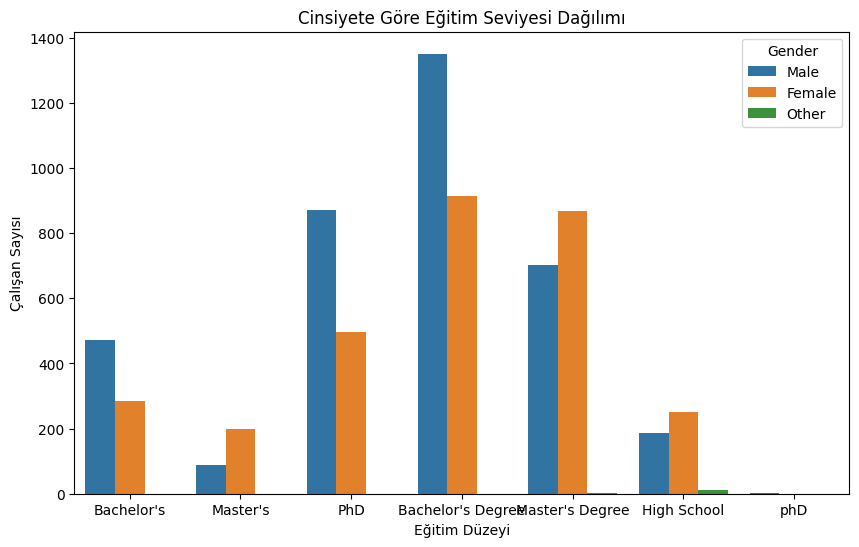

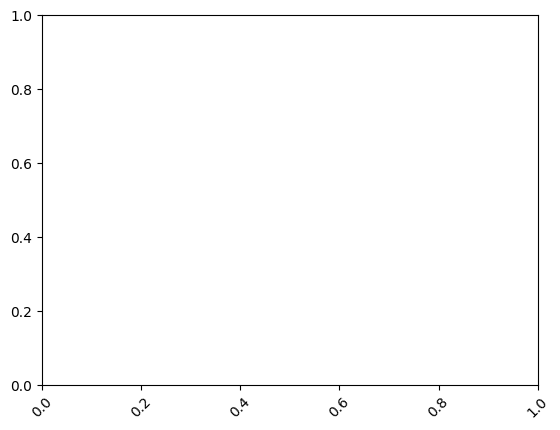

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education Level', hue='Gender', data=df)
plt.title('Cinsiyete Göre Eğitim Seviyesi Dağılımı')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Çalışan Sayısı')
plt.show()
plt.xticks(rotation=45)
plt.show()

İş Rolleri ve Çalışan Sayısı

In [ ]:
# print(df['Job Title'].unique())
print(df['Job Title'].value_counts())

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64


In [ ]:
fig = px.histogram(df, x="Job Title", color="Job Title")
fig.show()

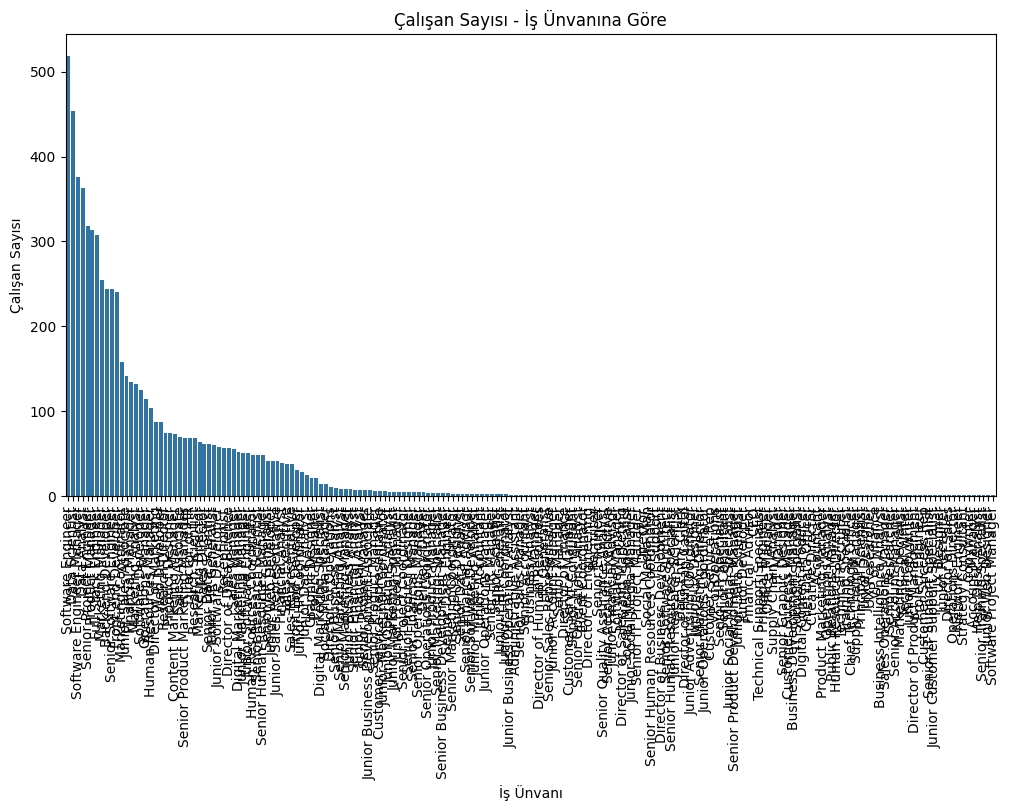

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Job Title', data=df, order=df['Job Title'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Çalışan Sayısı - İş Ünvanına Göre')
plt.xlabel('İş Ünvanı')
plt.ylabel('Çalışan Sayısı')
plt.show()

Meslek Gruplarına Göre Çalışan Erkek ve Kadın Sayısı

In [ ]:
gender_counts_by_job = df.groupby(['Job Title', 'Gender'])['Gender'].count().unstack()
gender_counts_by_job = gender_counts_by_job.fillna(0)
gender_counts_by_job

Gender,Female,Male,Other
Job Title,,,
Account Manager,0.0,1.0,0.0
Accountant,1.0,0.0,0.0
Administrative Assistant,2.0,0.0,0.0
Back end Developer,65.0,177.0,2.0
Business Analyst,1.0,1.0,0.0
...,...,...,...
UX Designer,1.0,0.0,0.0
UX Researcher,1.0,0.0,0.0
VP of Finance,0.0,1.0,0.0


Şirkette bulunan kişilerin Cinsiyetine Göre ortalama Maaş Değeri

In [ ]:
average_salary_by_gender = df.groupby('Gender')['Salary'].mean()
average_salary_by_gender

,Salary
Gender,
Female,107888.998672
Male,121395.697630
Other,125869.857143


Meslek Gruplarına Göre Ortalama Maaş Değerleri

In [ ]:
average_salary_job = df.groupby('Job Title')['Salary'].mean()
average_salary_job

,Salary
Job Title,
Account Manager,75000.000000
Accountant,55000.000000
Administrative Assistant,50000.000000
Back end Developer,102352.561475
Business Analyst,77500.000000
...,...
UX Designer,80000.000000
UX Researcher,65000.000000
VP of Finance,200000.000000


Meslek Gruplarına Göre Kadın ve Erkeklerin Ortalama Maaş Değerleri

In [ ]:
fig = go.Figure()

for gender in average_salary_gender_job.columns:
    fig.add_trace(go.Bar(
        x=average_salary_gender_job.index,
        y=average_salary_gender_job[gender],
        name=gender
    ))

fig.update_layout(
    title='Meslek Gruplarına Göre Kadın ve Erkeklerin Ortalama Maaşları',
    xaxis_title='Meslek Grubu',
    yaxis_title='Ortalama Maaş',
    barmode='group'
)
fig.show()

In [ ]:
average_salary_job_gender = df.groupby(['Job Title', 'Gender'])['Salary'].mean().unstack()
average_salary_job_gender = average_salary_job_gender.fillna(0)
average_salary_job_gender

Gender,Female,Male,Other
Job Title,,,
Account Manager,0.000000,75000.000000,0.0
Accountant,55000.000000,0.000000,0.0
Administrative Assistant,50000.000000,0.000000,0.0
Back end Developer,91942.938462,106155.254237,104127.0
Business Analyst,80000.000000,75000.000000,0.0
...,...,...,...
UX Designer,80000.000000,0.000000,0.0
UX Researcher,65000.000000,0.000000,0.0
VP of Finance,0.000000,200000.000000,0.0


In [ ]:
# gender_counts_by_job.plot(kind='bar', figsize=(10, 6))
# plt.title('Gender Distribution by Job Title')
# plt.xlabel('Job Title')
# plt.ylabel('Number of Employees')
# plt.xticks(rotation=45)
# plt.legend(title='Gender')
# plt.tight_layout()
# plt.show()

Çalışan Sayısına Göre En Fazla Olan İlk 10 Meslek Gruplarının Çalışan Kadın ve Erkek Sayısı

In [ ]:
top_10_jobs = gender_counts_by_job.sum(axis=1).nlargest(10).index
top_10_gender_counts = gender_counts_by_job.loc[top_10_jobs]
top_10_gender_counts

Gender,Female,Male,Other
Job Title,,,
Software Engineer,193.0,325.0,0.0
Data Scientist,202.0,251.0,0.0
Software Engineer Manager,100.0,276.0,0.0
Data Analyst,129.0,234.0,0.0
Senior Project Engineer,103.0,213.0,2.0
Product Manager,104.0,209.0,0.0
Full Stack Engineer,163.0,141.0,4.0
Marketing Manager,181.0,74.0,0.0
Back end Developer,65.0,177.0,2.0


In [ ]:
fig = go.Figure()
for gender in top_10_gender_counts.columns:
    fig.add_trace(go.Bar(x=top_10_gender_counts.index, y=top_10_gender_counts[gender], name=gender))
fig.update_layout(
    title="Top 10 Job Titles with Gender Counts",
    xaxis_title="Job Title",
    yaxis_title="Count",
    barmode="group"
)
fig.show()

Çalışan Sayısına Göre En Fazla Olan İlk 10 Meslek Gruplarının Çalışanların Cinsiyetlerine Göre Maaş Ortalamaları

In [ ]:
average_salaries_top_10 = df[df['Job Title'].isin(top_10_gender_counts.index)].groupby(['Job Title', 'Gender'])['Salary'].mean().unstack()
print(average_salaries_top_10)

Gender                            Female           Male     Other
Job Title                                                        
Back end Developer          91942.938462  106155.254237  104127.0
Data Analyst               114961.240310  130675.213675       NaN
Data Scientist             163202.970297  168442.231076       NaN
Full Stack Engineer        122738.417178  131648.929078  115212.5
Marketing Manager          113060.773481  127202.702703       NaN
Product Manager            172980.769231  127296.650718       NaN
Senior Project Engineer    150938.980583  173617.553991  166109.0
Senior Software Engineer   137907.230769  161369.176471  158788.0
Software Engineer          104668.393782  118335.384615       NaN
Software Engineer Manager  171792.900000  172759.148551       NaN


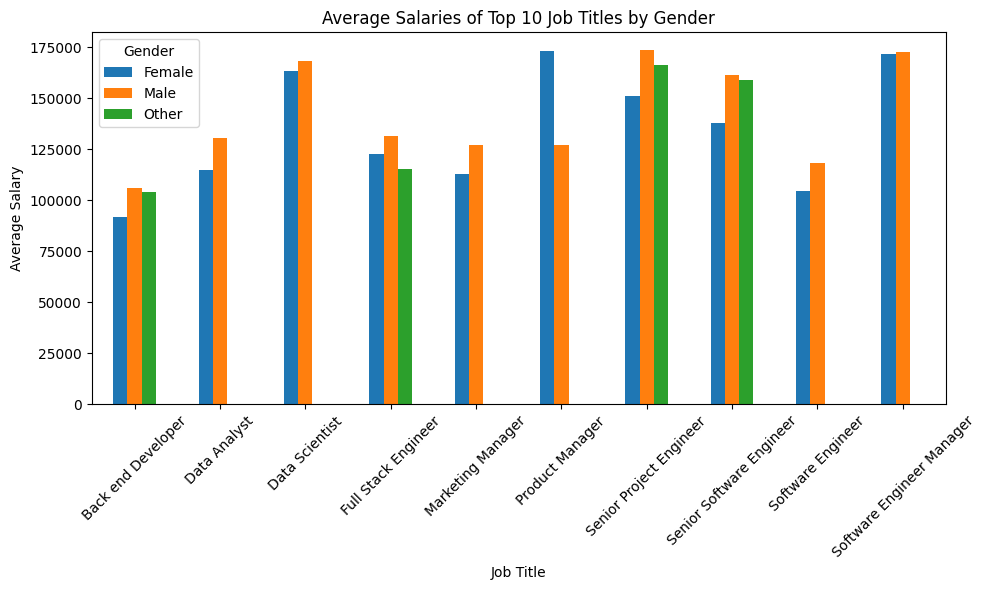

In [ ]:
average_salaries_top_10.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salaries of Top 10 Job Titles by Gender')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
print(df['Years of Experience'].unique())

[ 5.   3.  15.   7.  20.   2.  12.   4.   1.  10.  18.   6.  14.  16.
  0.  22.  19.   9.  13.  11.  25.  21.   8.  17.  23.  24.   0.5  1.5
 31.  30.  28.  33.  27.  34.  29.  26.  32. ]


Cinsiyetlerine Göre Ortalama Deneyim Süreleri

In [ ]:
average_years_by_gender = df.groupby('Gender')['Years of Experience'].mean();
print(average_years_by_gender)

Gender
Female     7.420179
Male       8.617407
Other     16.428571
Name: Years of Experience, dtype: float64


ilk 10 Meslek Grubunun Cinsiyetlerine Göre Deneyim Süreleri Ortalamaları

In [ ]:
top_10_jobs = gender_counts_by_job.sum(axis=1).nlargest(10).index
experience_by_gender_job = df[df['Job Title'].isin(top_10_jobs)].groupby(['Job Title', 'Gender'])['Years of Experience'].mean().unstack()
experience_by_gender_job

Gender,Female,Male,Other
Job Title,,,
Back end Developer,5.553846,6.231638,8.0
Data Analyst,4.558140,5.196581,NaN
Data Scientist,7.435644,14.127490,NaN
Full Stack Engineer,7.748466,10.425532,8.0
Marketing Manager,8.668508,11.378378,NaN
Product Manager,9.105769,7.138756,NaN
Senior Project Engineer,13.135922,14.788732,31.0
Senior Software Engineer,12.346154,14.801471,29.0
Software Engineer,3.906736,4.772308,NaN


In [ ]:
fig = go.Figure()
for gender in experience_by_gender_job.columns:
    fig.add_trace(go.Bar(x=experience_by_gender_job.index, y=experience_by_gender_job[gender], name=gender))
fig.update_layout(
    title="Cinsiyete ve İş Rolüne Göre Ortalama Deneyim Süreleri (İlk 10 Meslek)",
    xaxis_title="İş Rolü",
    yaxis_title="Deneyim Süresi Ortalaması",
    barmode="group"
)
fig.show()

In [ ]:
average_salary_by_job = df.groupby('Job Title')['Salary'].mean()
average_salary_by_job

,Salary
Job Title,
Account Manager,75000.000000
Accountant,55000.000000
Administrative Assistant,50000.000000
Back end Developer,102352.561475
Business Analyst,77500.000000
...,...
UX Designer,80000.000000
UX Researcher,65000.000000
VP of Finance,200000.000000


Years of Experience
0.0      29680.233333
0.5      35000.000000
1.0      46992.846296
1.5      36279.166667
2.0      58699.457377
3.0      72944.406977
4.0      83332.090038
5.0     103111.092732
6.0     111891.146119
7.0     122171.039773
8.0     126438.138824
9.0     138021.460526
10.0    131690.322917
11.0    153060.318750
12.0    153398.064626
13.0    153002.181818
14.0    168632.363636
15.0    160664.759690
16.0    183285.438017
17.0    184053.830189
18.0    184340.412698
19.0    182430.330579
20.0    182288.721311
21.0    176734.190476
22.0    188644.531915
23.0    189573.702703
24.0    211225.421053
25.0    177803.458333
26.0    187717.285714
27.0    187922.636364
28.0    189774.812500
29.0    181437.000000
30.0    163339.833333
31.0    183027.200000
32.0    192540.800000
33.0    186400.666667
34.0    188651.000000
Name: Salary, dtype: float64


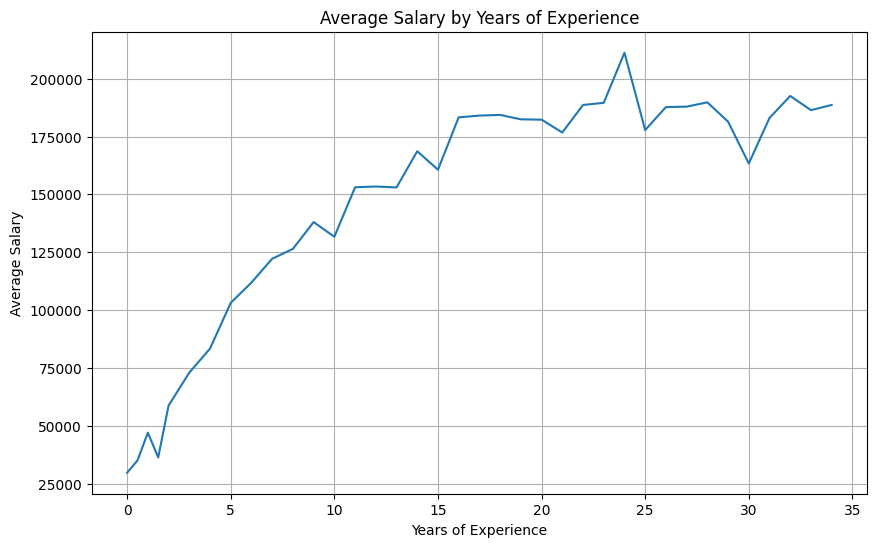

In [ ]:
average_salary_by_experience = df.groupby('Years of Experience')['Salary'].mean()
print(average_salary_by_experience)
plt.figure(figsize=(10, 6))
plt.plot(average_salary_by_experience.index, average_salary_by_experience.values)
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary')
plt.title('Average Salary by Years of Experience')
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objects as go
average_salary_by_experience = df.groupby('Years of Experience')['Salary'].mean()
fig = go.Figure(data=[go.Pie(labels=average_salary_by_experience.index, values=average_salary_by_experience.values)])
fig.update_layout(title="Average Salary Distribution by Years of Experience")
fig.show()

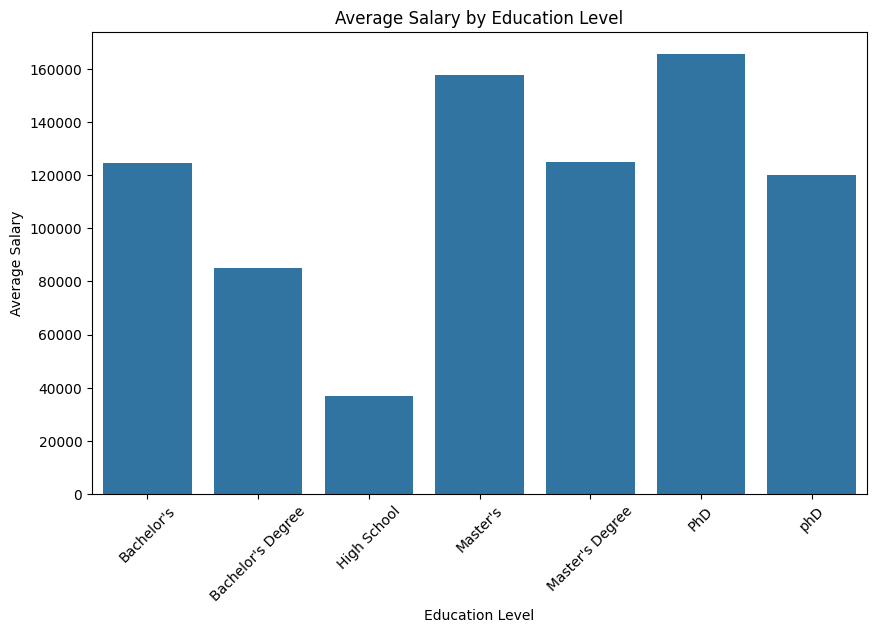

In [ ]:
average_salary_by_education = df.groupby('Education Level')['Salary'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_education.index, y=average_salary_by_education.values)
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Model Eğitimi ve Skorlar**

In [ ]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
cat_col = ['Gender', 'Education Level', 'Job Category']
df= df.dropna()

**İş unvanlarını kategorilere ayırma işlemi**

In [ ]:

mapping = {
    'Software & Engineering': [
        'Software Engineer Manager', 'Software Engineer', 'Junior Software Engineer', 'Senior Software Engineer',
        'Back end Developer', 'Front end Developer', 'Full Stack Engineer', 'Web Developer', 'Junior Software Developer',
        'Senior Engineer', 'Software Developer', 'Principal Engineer', 'Developer', 'Network Engineer'
    ],
    'Data & Analytics': [
        'Data Scientist', 'Senior Data Scientist', 'Junior Data Scientist', 'Data Analyst', 'Senior Data Analyst',
        'Junior Data Analyst', 'Operations Analyst', 'Senior Operations Analyst', 'Junior Operations Analyst',
        'Supply Chain Analyst', 'Director of Data Science', 'Senior Data Engineer'
    ],
    'Human Resources': [
        'HR Manager', 'Director of HR', 'Senior HR Manager', 'Junior HR Coordinator', 'Senior Human Resources Manager',
        'Human Resources Coordinator', 'HR Generalist', 'Junior HR Generalist', 'Senior HR Generalist',
        'Senior Human Resources Specialist', 'Director of Human Resources', 'Recruiter'
    ],
    'Sales & Business Development': [
        'Sales Representative', 'Sales Director', 'Junior Sales Associate', 'Sales Manager', 'Junior Sales Representative',
        'Business Development Manager', 'Junior Business Development Associate', 'Senior Business Development Manager',
        'Account Manager', 'Senior Account Manager'
    ],
    'Marketing & Communications': [
        'Marketing Manager', 'Senior Marketing Manager', 'Marketing Coordinator', 'Junior Marketing Specialist',
        'Junior Marketing Manager', 'Digital Marketing Specialist', 'Content Marketing Manager', 'Social Media Manager',
        'Senior Marketing Coordinator', 'Public Relations Manager'
    ],
    'Project & Product Management': [
        'Product Manager', 'Senior Product Manager', 'Junior Product Manager', 'Project Manager', 'Senior Project Manager',
        'Junior Project Manager', 'Senior Project Coordinator', 'Software Project Manager'
    ],
    'Finance & Accounting': [
        'Financial Manager', 'Senior Financial Manager', 'Financial Analyst', 'Senior Financial Analyst',
        'Junior Financial Analyst', 'Accountant', 'Junior Accountant', 'Financial Advisor', 'Senior Financial Advisor'
    ],
    'Research & Science': [
        'Research Scientist', 'Senior Research Scientist', 'Junior Research Scientist', 'Principal Scientist',
        'Senior Scientist', 'UX Researcher'
    ],
    'Support & Administration': [
        'Administrative Assistant', 'Receptionist', 'IT Support Specialist', 'Senior IT Support Specialist', 'IT Support',
        'IT Manager', 'Office Manager', 'Help Desk Analyst', 'Customer Service Representative', 'Customer Success Manager'
    ],
    'Leadership & Management': [
        'CEO', 'Director', 'VP of Operations', 'VP of Finance', 'Chief Data Officer', 'Chief Technology Officer',
        'Director of Marketing', 'Director of Sales and Marketing', 'Director of Product Management'
    ]
}

# Meslekleri gruplama
df['Job Category'] = df['Job Title'].map(lambda x: next((k for k, v in mapping.items() if x in v), 'Other'))


<ipython-input-36-4d3505154c65>:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Category
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Software & Engineering
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Data & Analytics
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Other
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Other
4,52.0,Male,Master's,Director,20.0,200000.0,Leadership & Management


**Özellikler (X) ve hedef değişkeni (y)**

In [ ]:
X=df.drop(columns=['Salary','Job Title'],axis=1)
y=df['Salary']
# Eğitim ve test setini ayırma işlemi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Age,Gender,Education Level,Years of Experience,Job Category
3426,39.0,Male,Master's Degree,10.0,Human Resources
1552,38.0,Female,Master's Degree,10.0,Software & Engineering
6021,35.0,Female,PhD,12.0,Other
4461,30.0,Female,High School,1.0,Sales & Business Development
3286,23.0,Female,Bachelor's Degree,1.0,Software & Engineering


In [ ]:
# OneHotEncoder ile kategorik değişkenleri dönüştürme
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(X_train[cat_col])

# Yeni sütun isimlerini alma
encoded_columns = encoder.get_feature_names_out(cat_col)
# Yeni DataFrame oluşturma
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)
# Eğitim setindeki kategorik sütunları çıkartıp, one-hot encoded sütunları ekleme
df_train = X_train.drop(columns=cat_col).reset_index(drop=True)
X_train = pd.concat([df_encoded,df_train ], axis=1)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender_Male                                5358 non-null   float64
 1   Gender_Other                               5358 non-null   float64
 2   Education Level_Bachelor's Degree          5358 non-null   float64
 3   Education Level_High School                5358 non-null   float64
 4   Education Level_Master's                   5358 non-null   float64
 5   Education Level_Master's Degree            5358 non-null   float64
 6   Education Level_PhD                        5358 non-null   float64
 7   Education Level_phD                        5358 non-null   float64
 8   Job Category_Finance & Accounting          5358 non-null   float64
 9   Job Category_Human Resources               5358 non-null   float64
 10  Job Category_Leadership 

In [ ]:
# LinearRegression Kullanarak Modeli Eğitme İşlemi
model_with_gender = LinearRegression()
model_with_gender.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Test seti içinde aynı işlemler
encoded_array = encoder.transform(X_test[cat_col])
# Yeni sütun isimlerini alma
encoded_columns = encoder.get_feature_names_out(cat_col)
# Yeni DataFrame oluşturma
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)
df_test= X_test.drop(columns=cat_col).reset_index(drop=True)
X_test = pd.concat([df_encoded,df_test ], axis=1)

In [ ]:
#  Test seti üzerinde tahmin yapma işlemi
y_pred = model_with_gender.predict(X_test)

In [ ]:
# Modelin performansı
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE with Gender: {rmse}')

RMSE with Gender: 24471.736283705333


In [ ]:
# Gender bilgisi ile thaminler ve farklar
X_preds_with = pd.DataFrame(X_test['Gender_Male'])
X_preds_with['preds'] = y_pred

In [ ]:
X_preds_with

,Gender_Male,preds
0,1.0,127489.707137
1,0.0,98584.038666
2,0.0,112838.298567
3,0.0,64123.590404
4,1.0,89069.728419
...,...,...
1335,0.0,92719.507902
1336,0.0,64123.590404
1337,0.0,111480.297607
1338,0.0,120272.716175


In [ ]:
# Gender sütunlarını kaldırarak ikinci modeli eğitelim
X_train_without = X_train.drop(['Gender_Male', 'Gender_Other'], axis=1)
X_test_without = X_test.drop(['Gender_Male', 'Gender_Other'], axis=1)

In [ ]:
# Gender'siz model ile eğitim
model_without_gender = LinearRegression()
model_without_gender.fit(X_train_without, y_train)

LinearRegression()

In [ ]:
# Gender'siz model ile tahmin yapalım
y_pred_without = model_without_gender.predict(X_test_without)
y_pred_without

array([126255.6353448 ,  99671.55545023, 113608.53739013, ...,
       112759.91741264, 121797.95554905,  76946.80264529])

In [ ]:
# Farkları hesaplayalım
X_preds_with['preds_without_gender'] = y_pred_without
X_preds_with['diff'] = X_preds_with['preds'] - X_preds_with['preds_without_gender']

In [ ]:
# Farkları ve ortalamalarını inceleyelim
mean_values = X_preds_with.groupby('Gender_Male')['diff'].mean()
mean_values

,diff
Gender_Male,
0.0,-1253.309676
1.0,1039.542304


In [ ]:
results = pd.DataFrame({
    'Gerçek Değerler': y_test.reset_index(drop=True),
    'Tahmin Edilen Değerler(With Gender)': y_pred,
    'Tahmin Edilen Değerler(Without Gender)': y_pred_without,
    'Gender_Male': X_test['Gender_Male'].reset_index(drop=True)  # Gender sütununu ekle
})

# Erkek verileri (Gender_Male = 1)
male_results = results[results['Gender_Male'] == 1].copy()
male_results.drop(columns=['Gender_Male'], inplace=True)  # Gender sütununu kaldır

# Kadın verileri (Gender_Male = 0)
female_results = results[results['Gender_Male'] == 0].copy()
female_results.drop(columns=['Gender_Male'], inplace=True)  # Gender sütununu kaldır

# Tabloyu göster
print("\nFemale Results:")
print(female_results.head())
print("Male Results:")
print(male_results.head())



Female Results:
   Gerçek Değerler  Tahmin Edilen Değerler(With Gender)  \
1          75969.0                         98584.038666   
2         100000.0                        112838.298567   
3          60000.0                         64123.590404   
7          55000.0                         81151.054343   
8         195000.0                        177535.540253   

   Tahmin Edilen Değerler(Without Gender)  
1                            99671.555450  
2                           113608.537390  
3                            65768.151552  
7                            82445.956156  
8                           178397.455279  
Male Results:
    Gerçek Değerler  Tahmin Edilen Değerler(With Gender)  \
0          150000.0                        127489.707137   
4           80000.0                         89069.728419   
5          190000.0                        155241.831710   
6           72000.0                         79211.597126   
10         100000.0                         88329.

**Aynı işlemlerin random forest ile yapılması**

In [ ]:
df = pd.read_csv('Salary_Data.csv')
df.head()
cat_col = ['Gender', 'Education Level', 'Job Category']

df = df.dropna()

mapping = {
    'Software & Engineering': ['Software Engineer Manager', 'Software Engineer', 'Junior Software Engineer', 'Senior Software Engineer', 'Back end Developer', 'Front end Developer', 'Full Stack Engineer', 'Web Developer', 'Junior Software Developer', 'Senior Engineer', 'Software Developer', 'Principal Engineer', 'Developer', 'Network Engineer'],
    'Data & Analytics': ['Data Scientist', 'Senior Data Scientist', 'Junior Data Scientist', 'Data Analyst', 'Senior Data Analyst', 'Junior Data Analyst', 'Operations Analyst', 'Senior Operations Analyst', 'Junior Operations Analyst', 'Supply Chain Analyst', 'Director of Data Science', 'Senior Data Engineer'],
    'Human Resources': ['HR Manager', 'Director of HR', 'Senior HR Manager', 'Junior HR Coordinator', 'Senior Human Resources Manager', 'Human Resources Coordinator', 'HR Generalist', 'Junior HR Generalist', 'Senior HR Generalist', 'Senior Human Resources Specialist', 'Director of Human Resources', 'Recruiter'],
    'Sales & Business Development': ['Sales Representative', 'Sales Director', 'Junior Sales Associate', 'Sales Manager', 'Junior Sales Representative', 'Business Development Manager', 'Junior Business Development Associate', 'Senior Business Development Manager', 'Account Manager', 'Senior Account Manager'],
    'Marketing & Communications': ['Marketing Manager', 'Senior Marketing Manager', 'Marketing Coordinator', 'Junior Marketing Specialist', 'Junior Marketing Manager', 'Digital Marketing Specialist', 'Content Marketing Manager', 'Social Media Manager', 'Senior Marketing Coordinator', 'Public Relations Manager'],
    'Project & Product Management': ['Product Manager', 'Senior Product Manager', 'Junior Product Manager', 'Project Manager', 'Senior Project Manager', 'Junior Project Manager', 'Senior Project Coordinator', 'Software Project Manager'],
    'Finance & Accounting': ['Financial Manager', 'Senior Financial Manager', 'Financial Analyst', 'Senior Financial Analyst', 'Junior Financial Analyst', 'Accountant', 'Junior Accountant', 'Financial Advisor', 'Senior Financial Advisor'],
    'Research & Science': ['Research Scientist', 'Senior Research Scientist', 'Junior Research Scientist', 'Principal Scientist', 'Senior Scientist', 'UX Researcher'],
    'Support & Administration': ['Administrative Assistant', 'Receptionist', 'IT Support Specialist', 'Senior IT Support Specialist', 'IT Support', 'IT Manager', 'Office Manager', 'Help Desk Analyst', 'Customer Service Representative', 'Customer Success Manager'],
    'Leadership & Management': ['CEO', 'Director', 'VP of Operations', 'VP of Finance', 'Chief Data Officer', 'Chief Technology Officer', 'Director of Marketing', 'Director of Sales and Marketing', 'Director of Product Management']
}
df['Job Category'] = df['Job Title'].map(lambda x: next((k for k, v in mapping.items() if x in v), 'Other'))


X = df.drop(columns=['Salary', 'Job Title'], axis=1)
y = df['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(X_train[cat_col])

encoded_columns = encoder.get_feature_names_out(cat_col)

df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)


df_train = X_train.drop(columns=cat_col).reset_index(drop=True)
X_train = pd.concat([df_encoded, df_train], axis=1)

# Random Forest modelini kullanarak eğitelim
model_with_gender = RandomForestRegressor(random_state=42, n_estimators=100)
model_with_gender.fit(X_train, y_train)


encoded_array = encoder.transform(X_test[cat_col])
encoded_columns = encoder.get_feature_names_out(cat_col)
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)
df_test = X_test.drop(columns=cat_col).reset_index(drop=True)
X_test = pd.concat([df_encoded, df_test], axis=1)


y_pred = model_with_gender.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE with Gender (Random Forest): {rmse}')


X_preds_with = pd.DataFrame(X_test['Gender_Male'])
X_preds_with['preds'] = y_pred


X_train_without = X_train.drop(['Gender_Male', 'Gender_Other'], axis=1)
X_test_without = X_test.drop(['Gender_Male', 'Gender_Other'], axis=1)


model_without_gender = RandomForestRegressor(random_state=42, n_estimators=100)
model_without_gender.fit(X_train_without, y_train)


y_pred_without = model_without_gender.predict(X_test_without)


X_preds_with['preds_without_gender'] = y_pred_without
X_preds_with['diff'] = X_preds_with['preds'] - X_preds_with['preds_without_gender']


mean_values = X_preds_with.groupby('Gender_Male')['diff'].mean()
mean_values

RMSE with Gender (Random Forest): 8623.26730597187


,diff
Gender_Male,
0.0,-796.316100
1.0,769.369212


In [ ]:
results = pd.DataFrame({
    'y_test': y_test.reset_index(drop=True),
    'y_pred_with_gender': y_pred,
    'y_pred_without_gender': y_pred_without,
    'Gender_Male': X_test['Gender_Male'].reset_index(drop=True)  # Gender sütununu ekle
})

# Erkek verileri (Gender_Male = 1)
male_results = results[results['Gender_Male'] == 1].copy()
male_results.drop(columns=['Gender_Male'], inplace=True)  # Gender sütununu kaldır

# Kadın verileri (Gender_Male = 0)
female_results = results[results['Gender_Male'] == 0].copy()
female_results.drop(columns=['Gender_Male'], inplace=True)  # Gender sütununu kaldır

# Tabloyu göster
print("Male Results:")
print(male_results.head())

print("\nFemale Results:")
print(female_results.head())

Male Results:
      y_test  y_pred_with_gender  y_pred_without_gender
0   150000.0       150000.000000          150000.000000
4    80000.0        83383.269508           82938.331807
5   190000.0       193815.772439          193815.772439
6    72000.0        72000.000000           72000.000000
10  100000.0        92541.735745           91841.394810

Female Results:
     y_test  y_pred_with_gender  y_pred_without_gender
1   75969.0        79114.393000           78186.744058
2  100000.0       100000.000000          100000.000000
3   60000.0        62268.955725           62146.153774
7   55000.0        55000.000000           55000.000000
8  195000.0       197413.679766          197455.923984


**Lasso Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Salary_Data.csv')
df.head()


cat_col = ['Gender', 'Education Level', 'Job Category']


df = df.dropna()


mapping = {
    'Software & Engineering': ['Software Engineer Manager', 'Software Engineer', 'Junior Software Engineer', 'Senior Software Engineer', 'Back end Developer', 'Front end Developer', 'Full Stack Engineer', 'Web Developer', 'Junior Software Developer', 'Senior Engineer', 'Software Developer', 'Principal Engineer', 'Developer', 'Network Engineer'],
    'Data & Analytics': ['Data Scientist', 'Senior Data Scientist', 'Junior Data Scientist', 'Data Analyst', 'Senior Data Analyst', 'Junior Data Analyst', 'Operations Analyst', 'Senior Operations Analyst', 'Junior Operations Analyst', 'Supply Chain Analyst', 'Director of Data Science', 'Senior Data Engineer'],
    'Human Resources': ['HR Manager', 'Director of HR', 'Senior HR Manager', 'Junior HR Coordinator', 'Senior Human Resources Manager', 'Human Resources Coordinator', 'HR Generalist', 'Junior HR Generalist', 'Senior HR Generalist', 'Senior Human Resources Specialist', 'Director of Human Resources', 'Recruiter'],
    'Sales & Business Development': ['Sales Representative', 'Sales Director', 'Junior Sales Associate', 'Sales Manager', 'Junior Sales Representative', 'Business Development Manager', 'Junior Business Development Associate', 'Senior Business Development Manager', 'Account Manager', 'Senior Account Manager'],
    'Marketing & Communications': ['Marketing Manager', 'Senior Marketing Manager', 'Marketing Coordinator', 'Junior Marketing Specialist', 'Junior Marketing Manager', 'Digital Marketing Specialist', 'Content Marketing Manager', 'Social Media Manager', 'Senior Marketing Coordinator', 'Public Relations Manager'],
    'Project & Product Management': ['Product Manager', 'Senior Product Manager', 'Junior Product Manager', 'Project Manager', 'Senior Project Manager', 'Junior Project Manager', 'Senior Project Coordinator', 'Software Project Manager'],
    'Finance & Accounting': ['Financial Manager', 'Senior Financial Manager', 'Financial Analyst', 'Senior Financial Analyst', 'Junior Financial Analyst', 'Accountant', 'Junior Accountant', 'Financial Advisor', 'Senior Financial Advisor'],
    'Research & Science': ['Research Scientist', 'Senior Research Scientist', 'Junior Research Scientist', 'Principal Scientist', 'Senior Scientist', 'UX Researcher'],
    'Support & Administration': ['Administrative Assistant', 'Receptionist', 'IT Support Specialist', 'Senior IT Support Specialist', 'IT Support', 'IT Manager', 'Office Manager', 'Help Desk Analyst', 'Customer Service Representative', 'Customer Success Manager'],
    'Leadership & Management': ['CEO', 'Director', 'VP of Operations', 'VP of Finance', 'Chief Data Officer', 'Chief Technology Officer', 'Director of Marketing', 'Director of Sales and Marketing', 'Director of Product Management']
}


df['Job Category'] = df['Job Title'].map(lambda x: next((k for k, v in mapping.items() if x in v), 'Other'))


X = df.drop(columns=['Salary', 'Job Title'], axis=1)
y = df['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(X_train[cat_col])


encoded_columns = encoder.get_feature_names_out(cat_col)

df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)


df_train = X_train.drop(columns=cat_col).reset_index(drop=True)
X_train = pd.concat([df_encoded, df_train], axis=1)

 # alpha değeri, regularization gücünü kontrol eder
model_with_gender = Lasso(alpha=0.1)
model_with_gender.fit(X_train, y_train)


encoded_array = encoder.transform(X_test[cat_col])
encoded_columns = encoder.get_feature_names_out(cat_col)
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)
df_test = X_test.drop(columns=cat_col).reset_index(drop=True)
X_test = pd.concat([df_encoded, df_test], axis=1)


y_pred = model_with_gender.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE with Gender (Lasso): {rmse}')


X_preds_with = pd.DataFrame(X_test['Gender_Male'])
X_preds_with['preds'] = y_pred


X_train_without = X_train.drop(['Gender_Male', 'Gender_Other'], axis=1)
X_test_without = X_test.drop(['Gender_Male', 'Gender_Other'], axis=1)


model_without_gender = Lasso(alpha=0.1)
model_without_gender.fit(X_train_without, y_train)


y_pred_without = model_without_gender.predict(X_test_without)


X_preds_with['preds_without_gender'] = y_pred_without
X_preds_with['diff'] = X_preds_with['preds'] - X_preds_with['preds_without_gender']

mean_values = X_preds_with.groupby('Gender_Male')['diff'].mean()
mean_values



RMSE with Gender (Lasso): 24471.70175090168


,diff
Gender_Male,
0.0,-1253.374597
1.0,1039.565909


**XGBRegressor**

In [ ]:
df = pd.read_csv('Salary_Data.csv')
df.head()

cat_col = ['Gender','Education Level','Job Category']
df = df.dropna()

mapping = {
    'Software & Engineering': [
        'Software Engineer Manager', 'Software Engineer', 'Junior Software Engineer', 'Senior Software Engineer',
        'Back end Developer', 'Front end Developer', 'Full Stack Engineer', 'Web Developer', 'Junior Software Developer',
        'Senior Engineer', 'Software Developer', 'Principal Engineer', 'Developer', 'Network Engineer'
    ],
    'Data & Analytics': [
        'Data Scientist', 'Senior Data Scientist', 'Junior Data Scientist', 'Data Analyst', 'Senior Data Analyst',
        'Junior Data Analyst', 'Operations Analyst', 'Senior Operations Analyst', 'Junior Operations Analyst',
        'Supply Chain Analyst', 'Director of Data Science', 'Senior Data Engineer'
    ],
    'Human Resources': [
        'HR Manager', 'Director of HR', 'Senior HR Manager', 'Junior HR Coordinator', 'Senior Human Resources Manager',
        'Human Resources Coordinator', 'HR Generalist', 'Junior HR Generalist', 'Senior HR Generalist',
        'Senior Human Resources Specialist', 'Director of Human Resources', 'Recruiter'
    ],
    'Sales & Business Development': [
        'Sales Representative', 'Sales Director', 'Junior Sales Associate', 'Sales Manager', 'Junior Sales Representative',
        'Business Development Manager', 'Junior Business Development Associate', 'Senior Business Development Manager',
        'Account Manager', 'Senior Account Manager'
    ],
    'Marketing & Communications': [
        'Marketing Manager', 'Senior Marketing Manager', 'Marketing Coordinator', 'Junior Marketing Specialist',
        'Junior Marketing Manager', 'Digital Marketing Specialist', 'Content Marketing Manager', 'Social Media Manager',
        'Senior Marketing Coordinator', 'Public Relations Manager'
    ],
    'Project & Product Management': [
        'Product Manager', 'Senior Product Manager', 'Junior Product Manager', 'Project Manager', 'Senior Project Manager',
        'Junior Project Manager', 'Senior Project Coordinator', 'Software Project Manager'
    ],
    'Finance & Accounting': [
        'Financial Manager', 'Senior Financial Manager', 'Financial Analyst', 'Senior Financial Analyst',
        'Junior Financial Analyst', 'Accountant', 'Junior Accountant', 'Financial Advisor', 'Senior Financial Advisor'
    ],
    'Research & Science': [
        'Research Scientist', 'Senior Research Scientist', 'Junior Research Scientist', 'Principal Scientist',
        'Senior Scientist', 'UX Researcher'
    ],
    'Support & Administration': [
        'Administrative Assistant', 'Receptionist', 'IT Support Specialist', 'Senior IT Support Specialist', 'IT Support',
        'IT Manager', 'Office Manager', 'Help Desk Analyst', 'Customer Service Representative', 'Customer Success Manager'
    ],
    'Leadership & Management': [
        'CEO', 'Director', 'VP of Operations', 'VP of Finance', 'Chief Data Officer', 'Chief Technology Officer',
        'Director of Marketing', 'Director of Sales and Marketing', 'Director of Product Management'
    ]
}

# Meslekleri gruplama
df['Job Category'] = df['Job Title'].map(lambda x: next((k for k, v in mapping.items() if x in v), 'Other'))

X=df.drop(columns=['Salary','Job Title'],axis=1)
y=df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(X_train[cat_col])

# Yeni sütun isimlerini alma
encoded_columns = encoder.get_feature_names_out(cat_col)
# Yeni DataFrame oluşturma
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)
df_train = X_train.drop(columns=cat_col).reset_index(drop=True)
X_train = pd.concat([df_encoded,df_train ], axis=1)

model_with_gender = XGBRegressor(random_state=42)
model_with_gender.fit(X_train, y_train)

encoded_array = encoder.transform(X_test[cat_col])
# Yeni sütun isimlerini alma
encoded_columns = encoder.get_feature_names_out(cat_col)
# Yeni DataFrame oluşturma
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)
df_test= X_test.drop(columns=cat_col).reset_index(drop=True)
X_test = pd.concat([df_encoded,df_test ], axis=1)

y_pred = model_with_gender.predict(X_test)
X_preds_with = pd.DataFrame(X_test['Gender_Male'])
X_preds_with['preds'] = y_pred

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(79715186)
rmse


X_train_without = X_train.drop(['Gender_Male','Gender_Other'],axis=1)
X_test_without = X_test.drop(['Gender_Male','Gender_Other'],axis=1)

model_without_gender = XGBRegressor(random_state=42)
model_without_gender.fit(X_train_without, y_train)

y_pred = model_without_gender.predict(X_test_without)
X_preds_with['preds_without_gender'] = y_pred

X_preds_with['diff'] = X_preds_with['preds']  - X_preds_with['preds_without_gender']

mean_values = X_preds_with.groupby('Gender_Male')['diff'].mean()
mean_values


,diff
Gender_Male,
0.0,-674.484009
1.0,692.221375


In [ ]:
results = pd.DataFrame({
    'Gerçek Değerler': y_test.reset_index(drop=True),
    'Tahmin Edilen Değerler(With Gender)': y_pred,
    'Tahmin Edilen Değerler(Without Gender)': y_pred_without,
    'Gender_Male': X_test['Gender_Male'].reset_index(drop=True)  # Gender sütununu ekle
})

# Erkek verileri (Gender_Male = 1)
male_results = results[results['Gender_Male'] == 1].copy()
male_results.drop(columns=['Gender_Male'], inplace=True)  # Gender sütununu kaldır

# Kadın verileri (Gender_Male = 0)
female_results = results[results['Gender_Male'] == 0].copy()
female_results.drop(columns=['Gender_Male'], inplace=True)  # Gender sütununu kaldır

# Tabloyu göster
print("\nFemale Results:")
print(female_results.head())
print("Male Results:")
print(male_results.head())


Female Results:
   Gerçek Değerler  Tahmin Edilen Değerler(With Gender)  \
1          75969.0                         91139.273438   
2         100000.0                         99653.929688   
3          60000.0                         61906.226562   
7          55000.0                         52678.277344   
8         195000.0                        197713.390625   

   Tahmin Edilen Değerler(Without Gender)  
1                            99672.692208  
2                           113602.605812  
3                            65768.704040  
7                            82449.405128  
8                           178395.523169  
Male Results:
    Gerçek Değerler  Tahmin Edilen Değerler(With Gender)  \
0          150000.0                        141643.953125   
4           80000.0                         85382.710938   
5          190000.0                        193541.796875   
6           72000.0                         72679.320312   
10         100000.0                         91707.

In [ ]:
X_preds_with = pd.DataFrame({
    'Cinsiyetine Göre Yapılan Tahmin': y_pred,
    'Cinsiyetten Bağımsız Tahmin': y_pred_without,
    'Fark': y_pred - y_pred_without  # Fark sütunu
})

# İlk 10 satır
X_preds_with.head(10)

,Cinsiyetine Göre Yapılan Tahmin,Cinsiyetten Bağımsız Tahmin,Fark
0,141643.953125,126256.180113,15387.773012
1,91139.273438,99672.692208,-8533.418771
2,99653.929688,113602.605812,-13948.676125
3,61906.226562,65768.704040,-3862.477477
4,85382.710938,87988.492564,-2605.781627
5,193541.796875,154274.675357,39267.121518
6,72679.320312,77385.690391,-4706.370079
7,52678.277344,82449.405128,-29771.127784
8,197713.390625,178395.523169,19317.867456
9,132177.375000,113191.334105,18986.040895
